In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

### Load Data

In [19]:
df = pd.read_csv('diabetes.csv')

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Basic EDA

In [21]:
print("Dataset have :-")
print(f"Number of row: {df.shape[0]}")
print(f"Number of column: {df.shape[1]}")

Dataset have :-
Number of row: 768
Number of column: 9


In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Feature Selection

In [25]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### Splitting Data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Building Models

In [27]:
classifier = DecisionTreeClassifier(criterion="entropy", random_state=100)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

### Evaluating Model

In [28]:
y_predict = classifier.predict(X_test)

In [29]:
acc_score = accuracy_score(y_test, y_predict)
print(f'Accuracy: {acc_score: .3f}%')

Accuracy:  0.667%


In [30]:
print(confusion_matrix(y_test, y_predict))  
print(classification_report(y_test, y_predict)) 

[[109  38]
 [ 39  45]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       147
           1       0.54      0.54      0.54        84

    accuracy                           0.67       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.67      0.67      0.67       231



### Visualizing Decision Trees

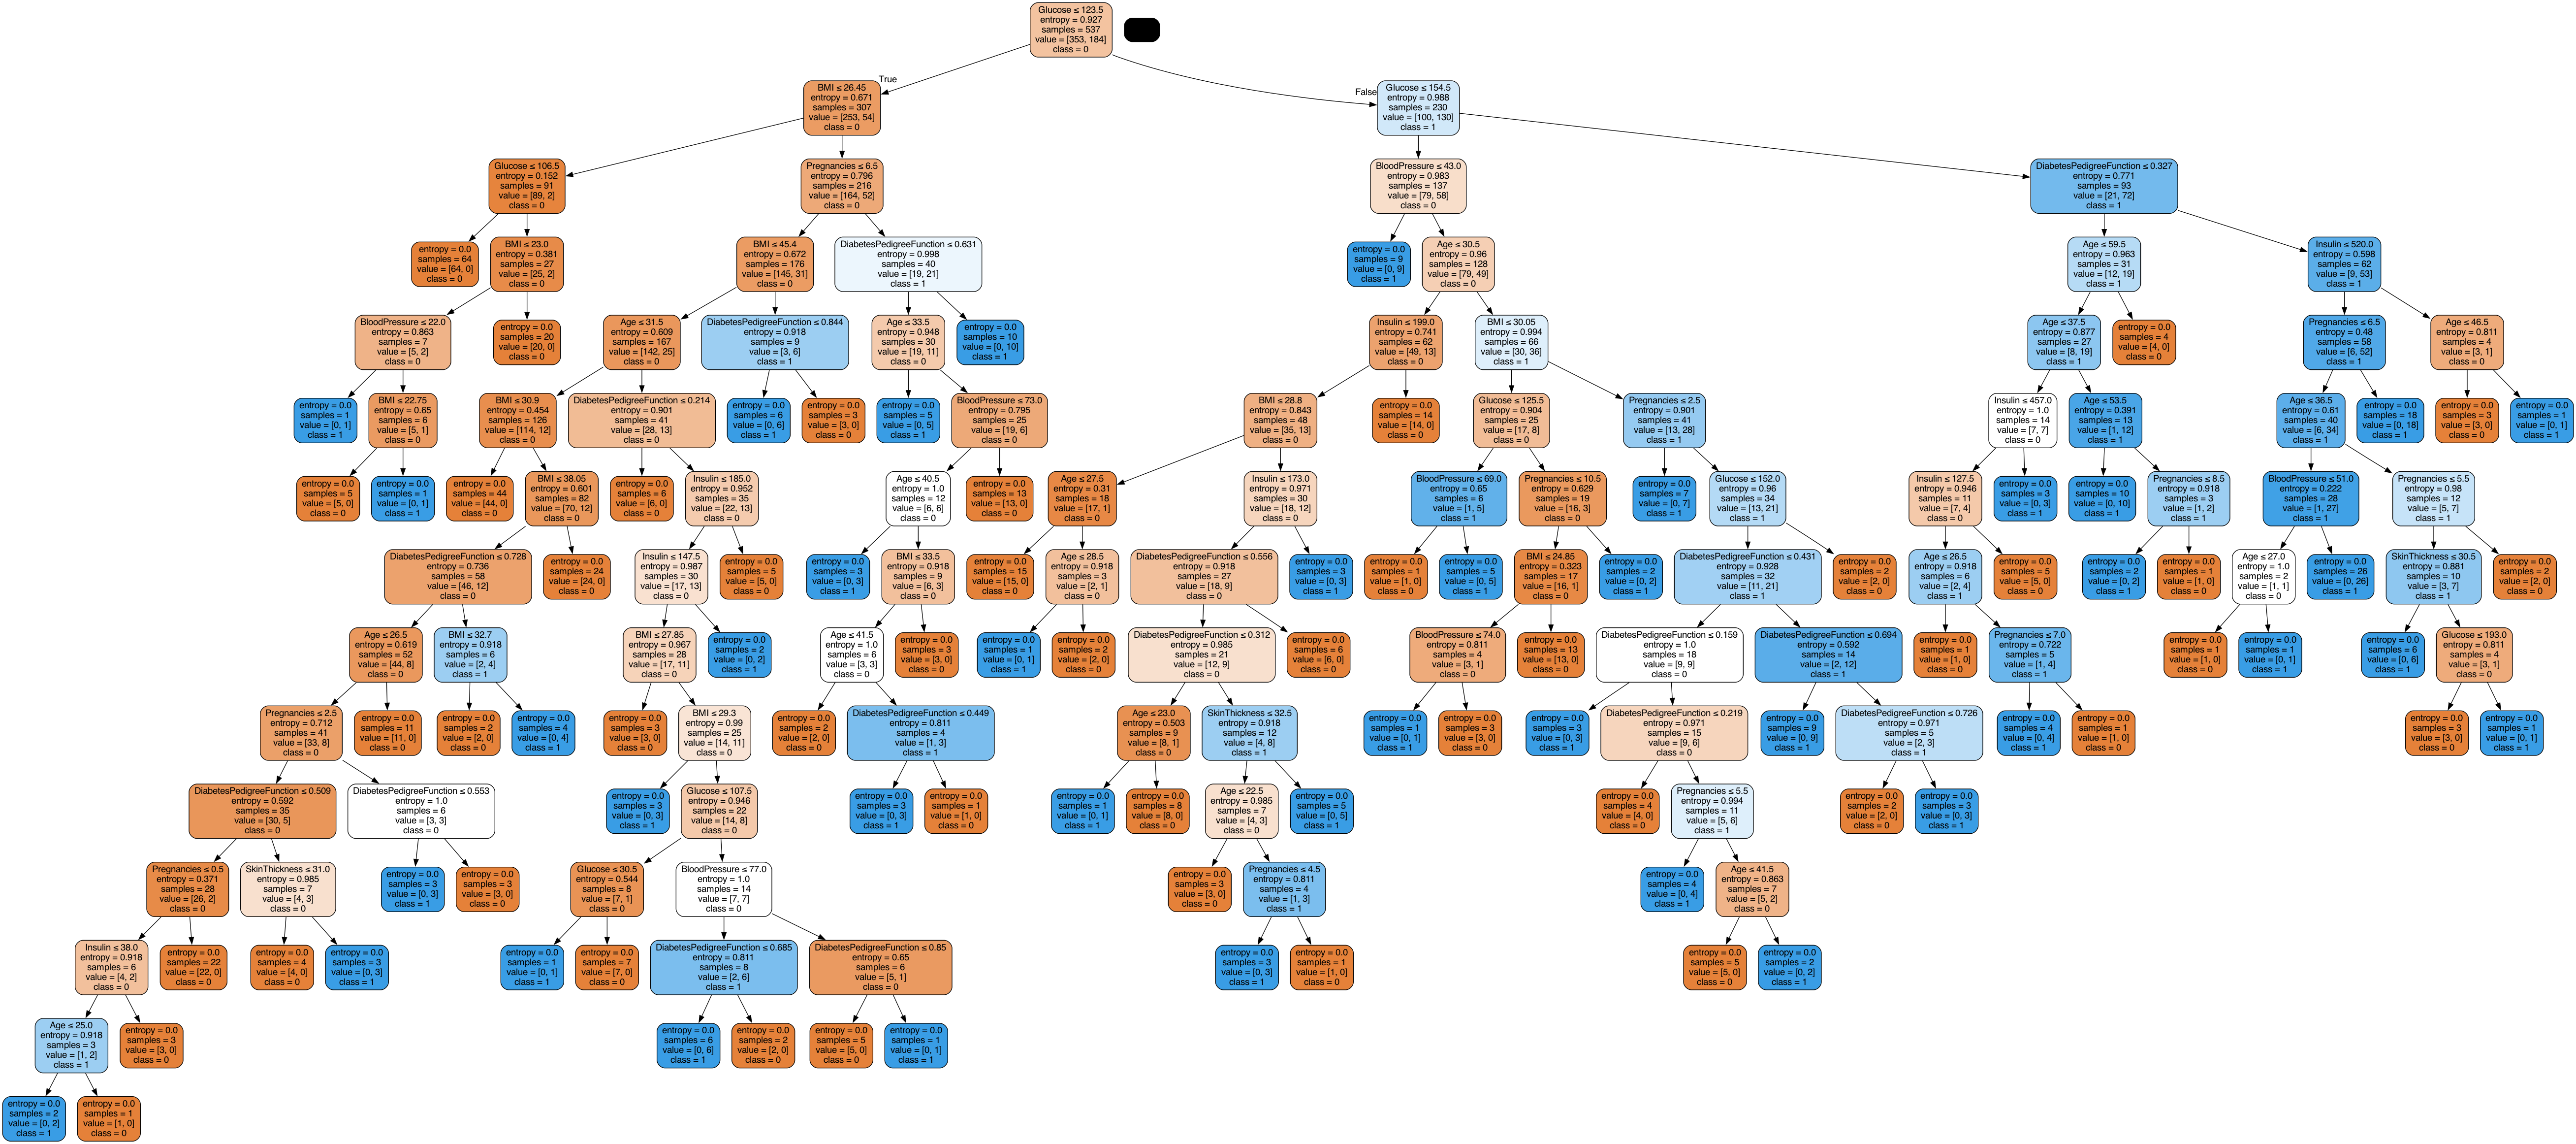

In [31]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### Optimizing Decision Tree Performance

In [32]:
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

classifier = classifier.fit(X_train,y_train)

In [33]:
y_predict = classifier.predict(X_test)

acc_score = accuracy_score(y_test, y_predict)
print(f'Accuracy: {acc_score: .3f}%')

Accuracy:  0.719%


### Visualizing Decision Trees

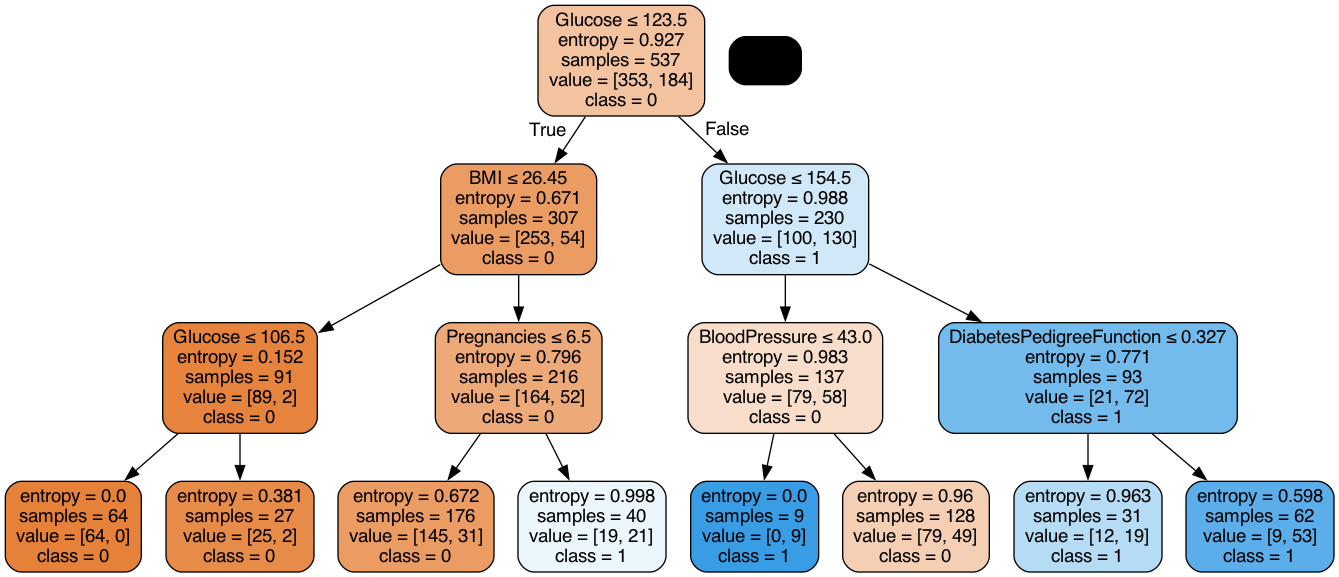

In [34]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())